**Kenya Data**

In [3]:
# Import the relevant modules (libraries/packages)

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
import requests
from bs4 import BeautifulSoup
import random
from wordcloud import WordCloud
import os
import spacy

import warnings

warnings.filterwarnings("ignore")



/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
# Installing the package pattern

!pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Spacy makes it easy to build systems for information extraction.

import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob

from pattern.en import sentiment

**Loading Data from relevant sources**

In [6]:
# Use request package to make a GET request for the website.

req =requests.get('https://www.the-star.co.ke/news/2023-03-04-here-is-my-experience-with-famous-chatgpt/')


In [7]:
# using the correct encoding of html page

req.encoding = 'utf-8'

In [9]:
# Extract the html
html = req.text

In [10]:
# Printing the first 100 characters in html
print(html[:5000])

 <!DOCTYPE html> <html lang="en-KE"><head><meta charset=utf-8><title>Here is my experience with famous ChatGPT</title> <meta name=cosmos:isProduction content=true> <meta name=referrer content=unsafe-url><meta http-equiv=X-UA-Compatible content="IE=edge"><meta name=keywords content="chatgpt,language model,kithure kindiki,kenya,artificial intelligence,bard,google,china square,chatbot,uhuru kenyatta,sauti sol,senate,sura,chatgpt,language model,kithure kindiki,kenya,chatbot,google,bard,artificial intelligence,china square,uhuru kenyatta,sauti sol,senate,sura,william ruto,interior,adchoicesadvertising,the star,star newspaper,the star kenya,kenya news,star,star newspaper kenya,star news,the star newspaper,bbc,openai,language model,kithure kindiki,china square,chatgpt,chatgpt artificial intelligence,artificial intelligence,kenya,uhuru kenyatta,chatbot,google,william ruto,interior,bard,sauti sol,senate,sura,adchoicesadvertising,bbc,openai, the star, kenya, star newspaper, the star kenya, kenya

In [11]:
# Create a BeautifulSoup object
soup = BeautifulSoup(html)

In [12]:
# Get the text out of the soup
text = soup.get_text()

In [13]:
len(text)

8488

In [14]:
# See some text

print(text[:2000])

Here is my experience with famous ChatGPT                       Section              Log In     News   News   World    Africa    Corridors of Power    Infographics    Podcasts    Big Read    Fact Checker    News Brief    Star Farmer    Twitter Space    News      Opinion   Opinion   Leader    Star Blogs    Columnists    Cartoon      Sports   Sports   Football    World Cup 2022    Athletics    Rugby    Tennis    Golf    Boxing    Basketball      Business   Business   Kenya    Africa    Markets    Commentary    Living Spaces      Counties   Counties   Nairobi    North Eastern    Coast    Central    Nyanza    Rift Valley    Western    Eastern      Siasa     Sasa   Sasa   Word Is    Lifestyle    Technology    Entertainment    Society    Fashion    Food    Travel    Books      Classifieds     Today's E-Paper   More More   Health     WomenWork     Coronavirus     Star Live     InPictures    Partner Sites   Classic 105     East FM     KISS 100     Radio Jambo     Mpasho     Register Login    T

In [15]:
# Show the entire text

text

'Here is my experience with famous ChatGPT                       Section              Log In     News   News   World    Africa    Corridors of Power    Infographics    Podcasts    Big Read    Fact Checker    News Brief    Star Farmer    Twitter Space    News      Opinion   Opinion   Leader    Star Blogs    Columnists    Cartoon      Sports   Sports   Football    World Cup 2022    Athletics    Rugby    Tennis    Golf    Boxing    Basketball      Business   Business   Kenya    Africa    Markets    Commentary    Living Spaces      Counties   Counties   Nairobi    North Eastern    Coast    Central    Nyanza    Rift Valley    Western    Eastern      Siasa     Sasa   Sasa   Word Is    Lifestyle    Technology    Entertainment    Society    Fashion    Food    Travel    Books      Classifieds     Today\'s E-Paper   More More   Health     WomenWork     Coronavirus     Star Live     InPictures    Partner Sites   Classic 105     East FM     KISS 100     Radio Jambo     Mpasho     Register Login   

In [16]:
clean_text= text.replace("\n", " ")

In [17]:
clean_text= clean_text.replace("/", " ")       

In [18]:
clean_text= ''.join([c for c in clean_text if c != "\'"])

In [19]:
clean_text

'Here is my experience with famous ChatGPT                       Section              Log In     News   News   World    Africa    Corridors of Power    Infographics    Podcasts    Big Read    Fact Checker    News Brief    Star Farmer    Twitter Space    News      Opinion   Opinion   Leader    Star Blogs    Columnists    Cartoon      Sports   Sports   Football    World Cup 2022    Athletics    Rugby    Tennis    Golf    Boxing    Basketball      Business   Business   Kenya    Africa    Markets    Commentary    Living Spaces      Counties   Counties   Nairobi    North Eastern    Coast    Central    Nyanza    Rift Valley    Western    Eastern      Siasa     Sasa   Sasa   Word Is    Lifestyle    Technology    Entertainment    Society    Fashion    Food    Travel    Books      Classifieds     Todays E-Paper   More More   Health     WomenWork     Coronavirus     Star Live     InPictures    Partner Sites   Classic 105     East FM     KISS 100     Radio Jambo     Mpasho     Register Login    T

In [20]:
# Get the sentences

sentence=[]


tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [21]:
sentence

['Here is my experience with famous ChatGPT                       Section              Log',
 'In     News   News   World    Africa    Corridors of Power    Infographics    Podcasts    Big Read    Fact Checker    News Brief    Star Farmer    Twitter Space    News      Opinion   Opinion   Leader    Star Blogs    Columnists    Cartoon      Sports   Sports   Football    World Cup 2022    Athletics    Rugby    Tennis    Golf    Boxing    Basketball      Business   Business   Kenya    Africa    Markets    Commentary    Living Spaces      Counties   Counties   Nairobi    North Eastern    Coast    Central    Nyanza    Rift Valley    Western    Eastern      Siasa',
 'Sasa   Sasa   Word Is    Lifestyle    Technology    Entertainment    Society    Fashion    Food    Travel    Books      Classifieds     Todays E-Paper   More More   Health     WomenWork     Coronavirus     Star Live     InPictures    Partner Sites   Classic 105     East FM     KISS 100     Radio Jambo     Mpasho     Register Login

**There are 52 sentences**

In [22]:
print(len(sentence))

52


In [23]:
# Using TextBlob
textblob_sentiment=[]

for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    
    textblob_sentiment.append([s,a,b])


In [24]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity']) 

In [25]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      52 non-null     object 
 1   Polarity      52 non-null     float64
 2   Subjectivity  52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


**Polarity is between -1 (extreme negative), 0 (neutral) and 1 (extreme positive**

**Subjectivity is from 0 to 1, where 1 is extremely subjective**

In [26]:
df_textblob.head(20)

,Sentence,Polarity,Subjectivity
0,Here is my experience with famous ChatGPT ...,0.500000,1.000000
1,In News News World Africa Corrid...,0.000000,0.170833
2,Sasa Sasa Word Is Lifestyle Technolo...,0.162879,0.293750
3,Sasa Word Is Lifestyle Technology ...,0.166667,0.166667
4,000Email:,0.000000,0.000000
5,[email protected]Connect With Us ...,0.400000,0.800000
6,Simply register at no cost.,0.000000,0.357143
7,Register Questions or problems?,0.000000,0.000000
8,Email,0.000000,0.000000
9,[email protected] or call 0711 046 000.,0.000000,0.000000


Text(0.5, 9.444444444444438, 'Sentence Polarity (Textblob)')

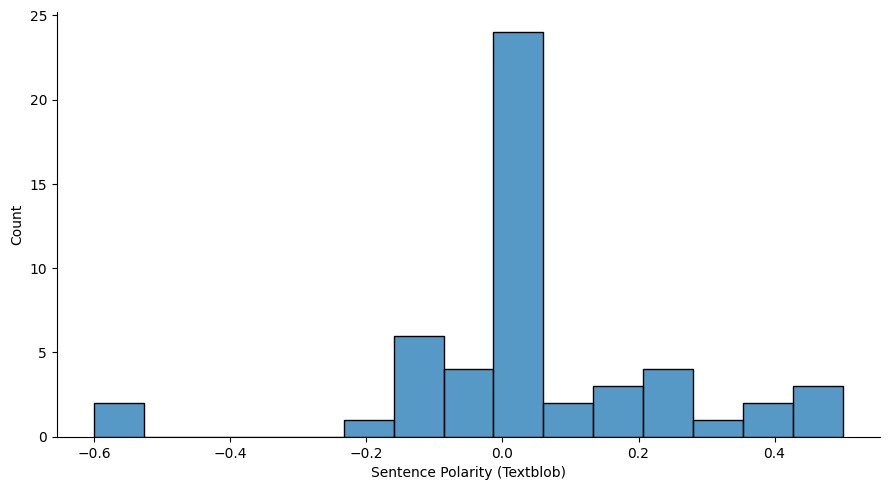

In [27]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Textblob)')

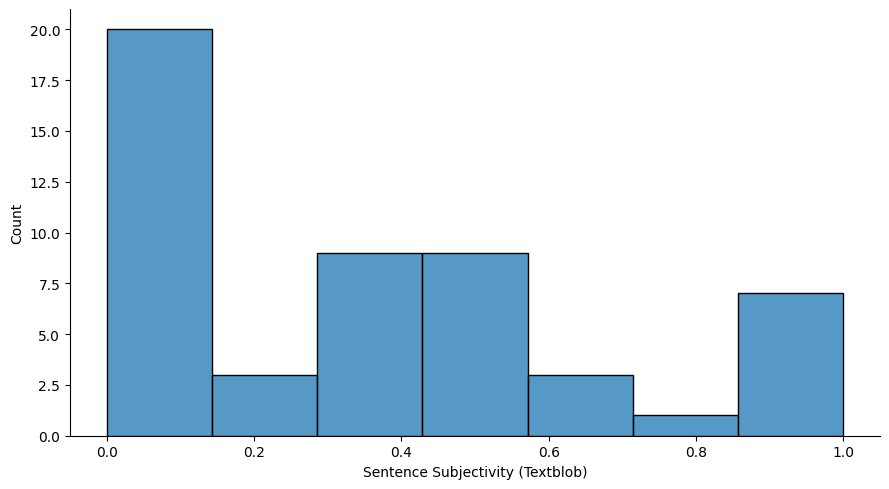

In [28]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [29]:
# Word cloud

clean_text[100:800]

'   News   World    Africa    Corridors of Power    Infographics    Podcasts    Big Read    Fact Checker    News Brief    Star Farmer    Twitter Space    News      Opinion   Opinion   Leader    Star Blogs    Columnists    Cartoon      Sports   Sports   Football    World Cup 2022    Athletics    Rugby    Tennis    Golf    Boxing    Basketball      Business   Business   Kenya    Africa    Markets    Commentary    Living Spaces      Counties   Counties   Nairobi    North Eastern    Coast    Central    Nyanza    Rift Valley    Western    Eastern      Siasa     Sasa   Sasa   Word Is    Lifestyle    Technology    Entertainment    Society    Fashion    Food    Travel    Books      Classifieds     To'

In [30]:
clean_text

'Here is my experience with famous ChatGPT                       Section              Log In     News   News   World    Africa    Corridors of Power    Infographics    Podcasts    Big Read    Fact Checker    News Brief    Star Farmer    Twitter Space    News      Opinion   Opinion   Leader    Star Blogs    Columnists    Cartoon      Sports   Sports   Football    World Cup 2022    Athletics    Rugby    Tennis    Golf    Boxing    Basketball      Business   Business   Kenya    Africa    Markets    Commentary    Living Spaces      Counties   Counties   Nairobi    North Eastern    Coast    Central    Nyanza    Rift Valley    Western    Eastern      Siasa     Sasa   Sasa   Word Is    Lifestyle    Technology    Entertainment    Society    Fashion    Food    Travel    Books      Classifieds     Todays E-Paper   More More   Health     WomenWork     Coronavirus     Star Live     InPictures    Partner Sites   Classic 105     East FM     KISS 100     Radio Jambo     Mpasho     Register Login    T

In [31]:
# Create tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+, 0-9, d+')

In [32]:
# Converting the sentence into words WORD TOKENIZE

from nltk.tokenize import word_tokenize

In [33]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
chatGPT_words = word_tokenize(clean_text)

In [35]:
chatGPT_words = [word for word in chatGPT_words if word.isalnum()]

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
from nltk.corpus import stopwords

In [38]:
stopwords = set(stopwords.words('english'))

In [39]:
chatGPT_words = [word for word in chatGPT_words if not str.lower(word) in stopwords]

In [40]:
# Check the frequency and probabilities
from nltk.probability import FreqDist

In [41]:
word_frequency = FreqDist(chatGPT_words)

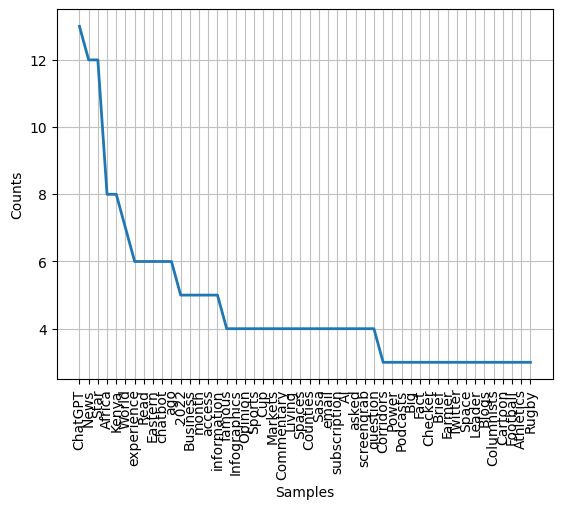

<Axes: xlabel='Samples', ylabel='Counts'>

In [42]:
# A plot of word frequency
word_frequency.plot(50, cumulative=False)

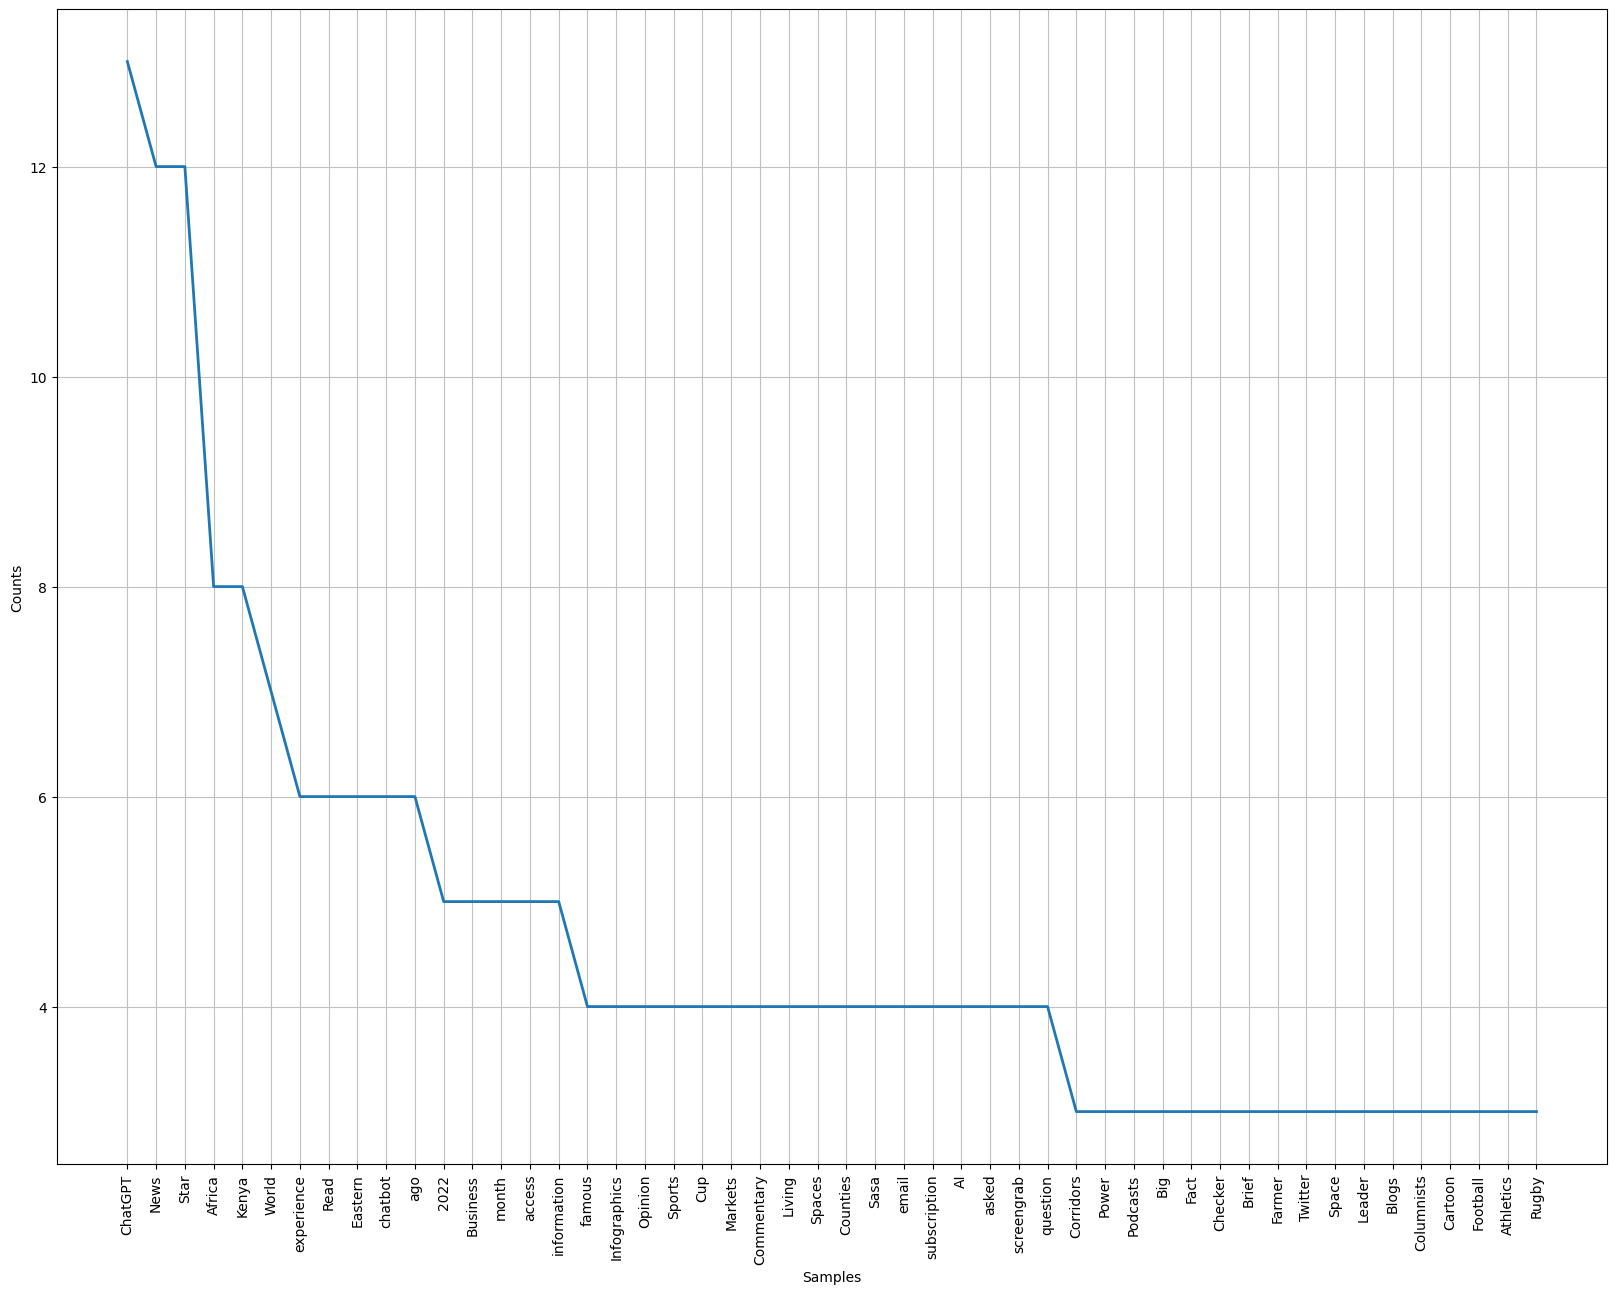

<Axes: xlabel='Samples', ylabel='Counts'>

In [43]:
# Make the above larger
plt.figure(figsize=(20,15))
word_frequency.plot(50, cumulative=False)

In [44]:
# Remove words that are not needed for our analysis.
# We have 50 words at the moment, remove new stopwords

chatGPT_words = [w for w in chatGPT_words if not w in ['2022',]]


In [45]:
chatGPT_words

['experience',
 'famous',
 'ChatGPT',
 'Section',
 'Log',
 'News',
 'News',
 'World',
 'Africa',
 'Corridors',
 'Power',
 'Infographics',
 'Podcasts',
 'Big',
 'Read',
 'Fact',
 'Checker',
 'News',
 'Brief',
 'Star',
 'Farmer',
 'Twitter',
 'Space',
 'News',
 'Opinion',
 'Opinion',
 'Leader',
 'Star',
 'Blogs',
 'Columnists',
 'Cartoon',
 'Sports',
 'Sports',
 'Football',
 'World',
 'Cup',
 'Athletics',
 'Rugby',
 'Tennis',
 'Golf',
 'Boxing',
 'Basketball',
 'Business',
 'Business',
 'Kenya',
 'Africa',
 'Markets',
 'Commentary',
 'Living',
 'Spaces',
 'Counties',
 'Counties',
 'Nairobi',
 'North',
 'Eastern',
 'Coast',
 'Central',
 'Nyanza',
 'Rift',
 'Valley',
 'Western',
 'Eastern',
 'Siasa',
 'Sasa',
 'Sasa',
 'Word',
 'Lifestyle',
 'Technology',
 'Entertainment',
 'Society',
 'Fashion',
 'Food',
 'Travel',
 'Books',
 'Classifieds',
 'Todays',
 'Health',
 'WomenWork',
 'Coronavirus',
 'Star',
 'Live',
 'InPictures',
 'Partner',
 'Sites',
 'Classic',
 '105',
 'East',
 'FM',
 'KISS'

In [46]:
from wordcloud import WordCloud

In [47]:
chatGPT_words_new = (" ").join(chatGPT_words)

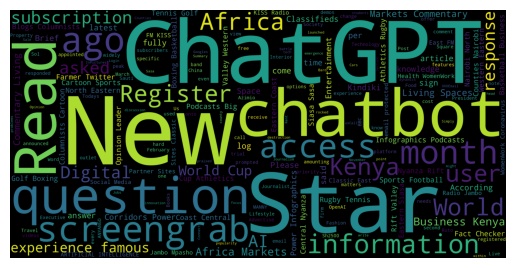

In [48]:
wordcloud = WordCloud(width=4000, height=2000).generate(chatGPT_words_new)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()